In [1]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]

# **Burglar Alarm Probem:**

Sally’s burglar alarm has gone off. She lives in an apartment with three rooms (rooms 0, 1, and 2) and is sure the burglar entered through room 0. She has motion sensors in each room, and they have gone off in the last 4 hours in rooms 0, 0, 2, and 2. The probability matrix P
for visible variables given the hidden ones and transition matrix T are as provided below.

Where is the most probable location of the buglar now?

In [2]:
# OBSERVATION PROBABILITIES
# row = hidden variable (burglar location)
# column = observed variable (room where alarm that goes off)
P = np.array([[0.6,0.2,0.2],
              [0.2,0.6,0.2],
              [0.2,0.2,0.6]])

# TRANSITION MATRIX
# row = current state of hidden variable (burglar location)
# column = next state of hidden varaible (burglar location)
T = np.array([[0.1,0.4,0.5],
              [0.4,0.0,0.6],
              [0.0,0.6,0.4]])

# Vector of indicators of which motion detector recorded movement for each hour
# Hour 0: 0
# Hour 1: 0
# Hour 2: 2
# Hour 3: 2
Obs = np.array([0,0,2,2])

In [3]:
# HOUR 0
hidden_prob_0 = np.array([1,0,0])
print(hidden_prob_0)

[1 0 0]


In [4]:
# HOUR 1
a_hidden_prob_1 = np.zeros(3)

# Likelihood at Hour 1 that burglar is in state / location 0 is product
# of element 0.6 of probability matrix corresponding to state / location 0 and observation (i.e., number of room in which motion is detected) 0 at Hour 1
# times an expected value.
# The expected value of the probability that the buglar is in state / location 0 when "you don't include the observation" is the sum of 3 products.
# Each product is the product of
# a different element of our transition matrix in the column corresponding to state / location 0 (e.g., the probability of transition from state 0 to state 0)
# and the probability that the buglar was in a different room at Hour 
0.
a_hidden_prob_1[0] = P[0,Obs[1]] * (T[0,0]*hidden_prob_0[0] + T[1,0]*hidden_prob_0[1] + T[2,0]*hidden_prob_0[2])

# Likelihood at Hour 1 that burglar is in location 1
a_hidden_prob_1[1] = P[1,Obs[1]] * (T[0,1]*hidden_prob_0[0] + T[1,1]*hidden_prob_0[1] + T[2,1]*hidden_prob_0[2])

# Likelihood at Hour 1 that burglar is in location 2
a_hidden_prob_1[2] = P[2,Obs[1]] * (T[0,2]*hidden_prob_0[0] + T[1,2]*hidden_prob_0[1] + T[2,2]*hidden_prob_0[2])

print(a_hidden_prob_1)

hidden_prob_1 = a_hidden_prob_1/np.sum(a_hidden_prob_1)
print(hidden_prob_1)

[0.06 0.08 0.1 ]
[0.25       0.33333333 0.41666667]


In [5]:
a_hidden_prob_2 = np.zeros(3)
a_hidden_prob_2[0] = P[0,Obs[2]] * (T[0,0]*hidden_prob_1[0] + T[1,0]*hidden_prob_1[1] + T[2,0]*hidden_prob_1[2])
a_hidden_prob_2[1] = P[1,Obs[2]] * (T[0,1]*hidden_prob_1[0] + T[1,1]*hidden_prob_1[1] + T[2,1]*hidden_prob_1[2])
a_hidden_prob_2[2] = P[2,Obs[2]] * (T[0,2]*hidden_prob_1[0] + T[1,2]*hidden_prob_1[1] + T[2,2]*hidden_prob_1[2])
print(a_hidden_prob_2)
hidden_prob_2 = a_hidden_prob_2/np.sum(a_hidden_prob_2)
print(hidden_prob_2)

[0.03166667 0.07       0.295     ]
[0.07983193 0.17647059 0.74369748]


In [6]:
a_hidden_prob_3 = np.zeros(3)
a_hidden_prob_3[0] = P[0,Obs[3]] * (T[0,0]*hidden_prob_2[0] + T[1,0]*hidden_prob_2[1] + T[2,0]*hidden_prob_2[2])
a_hidden_prob_3[1] = P[1,Obs[3]] * (T[0,1]*hidden_prob_2[0] + T[1,1]*hidden_prob_2[1] + T[2,1]*hidden_prob_2[2])
a_hidden_prob_3[2] = P[2,Obs[3]] * (T[0,2]*hidden_prob_2[0] + T[1,2]*hidden_prob_2[1] + T[2,2]*hidden_prob_2[2])
print(a_hidden_prob_3)
hidden_prob_3 = a_hidden_prob_3/np.sum(a_hidden_prob_3)
print(hidden_prob_3)

[0.01571429 0.09563025 0.26596639]
[0.04164811 0.25345212 0.70489978]


At Hour 3, according to the normalized vector of likelihoods that buglar is in rooms 0, 1, and 2, it is most likely (70.5 percent likely) that the buglar is in room 2.

# Computuing Probabilities of States and Paths:
## [WILL NOT RUN UNTIL PROBABILITES FOR ALL HOURS ABOVE ARE COMPUTED.]

In [7]:
# path of most probable states
most_propable_state = np.zeros(4)
most_propable_state[0] = np.argmax(hidden_prob_0)
most_propable_state[1] = np.argmax(hidden_prob_1)
most_propable_state[2] = np.argmax(hidden_prob_2)
most_propable_state[3] = np.argmax(hidden_prob_3)
print(most_propable_state)

[0. 2. 2. 2.]


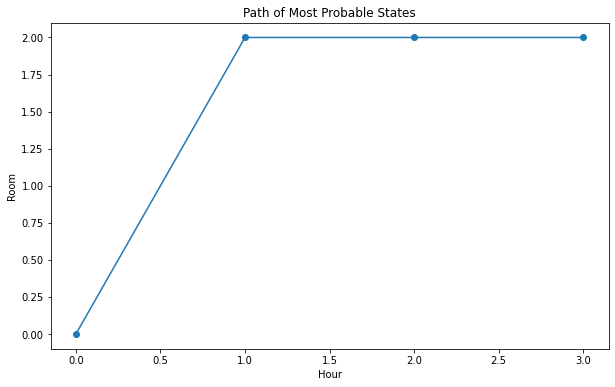

In [8]:
plt.figure()
plt.plot(most_propable_state, 'o-')
plt.xlabel('Hour')
plt.ylabel('Room')
plt.title('Path of Most Probable States')
plt.show()

# Computing Probabilities of Paths

In [9]:
# generate a list of all possible paths (for example [0,0,2,2] or [1,2,0,1], etc.)
num_states = 3
num_hours = 4 
paths_previous = [[0],[1],[2]]
for hours in range(num_hours-1):
    paths_next = []
    for path in paths_previous:
        for state in range(num_states):
            paths_next.append(path + [state])
    paths_previous = paths_next
paths = paths_next
num_paths = len(paths)

In [10]:
# compute the probability for each path
path_probabilities = []
for path in paths:
    path_probabilities.append(
            hidden_prob_0[path[0]] *   # porbability that the buglar was in room path[0] in hour 0
            P[path[1],Obs[1]]*T[path[0],path[1]] * # (likelihood buglar was in path[1] given Obs[1])*P(transitoned from path[0] to path[1])
            P[path[2],Obs[2]]*T[path[1],path[2]] * # (likelihood buglar was in path[2] given Obs[2])*P(transitoned from path[1] to path[2])
            P[path[3],Obs[3]]*T[path[2],path[3]])  # (likelihood buglar was in path[3] given Obs[3])*P(transitoned from path[2] to path[3])
path_probabilities = path_probabilities/np.sum(path_probabilities)

In [11]:
for i in range(81):
    print('P[', end =" ")
    print(paths[i], end =" ")
    print('] = ', end =" ")
    print(path_probabilities[i])

P[ [0, 0, 0, 0] ] =  0.0006681514476614699
P[ [0, 0, 0, 1] ] =  0.0026726057906458797
P[ [0, 0, 0, 2] ] =  0.010022271714922048
P[ [0, 0, 1, 0] ] =  0.010690423162583519
P[ [0, 0, 1, 1] ] =  0.0
P[ [0, 0, 1, 2] ] =  0.04810690423162583
P[ [0, 0, 2, 0] ] =  0.0
P[ [0, 0, 2, 1] ] =  0.06013363028953228
P[ [0, 0, 2, 2] ] =  0.12026726057906456
P[ [0, 1, 0, 0] ] =  0.00356347438752784
P[ [0, 1, 0, 1] ] =  0.01425389755011136
P[ [0, 1, 0, 2] ] =  0.053452115812917596
P[ [0, 1, 1, 0] ] =  0.0
P[ [0, 1, 1, 1] ] =  0.0
P[ [0, 1, 1, 2] ] =  0.0
P[ [0, 1, 2, 0] ] =  0.0
P[ [0, 1, 2, 1] ] =  0.09621380846325167
P[ [0, 1, 2, 2] ] =  0.19242761692650331
P[ [0, 2, 0, 0] ] =  0.0
P[ [0, 2, 0, 1] ] =  0.0
P[ [0, 2, 0, 2] ] =  0.0
P[ [0, 2, 1, 0] ] =  0.0267260579064588
P[ [0, 2, 1, 1] ] =  0.0
P[ [0, 2, 1, 2] ] =  0.12026726057906456
P[ [0, 2, 2, 0] ] =  0.0
P[ [0, 2, 2, 1] ] =  0.08017817371937638
P[ [0, 2, 2, 2] ] =  0.16035634743875277
P[ [1, 0, 0, 0] ] =  0.0
P[ [1, 0, 0, 1] ] =  0.0
P[ [1, 0, 0, 

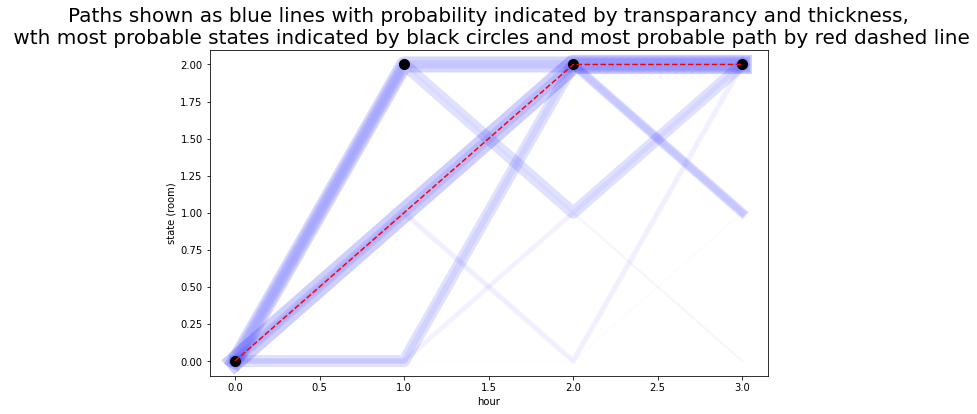

In [12]:
# plot the paths with their probabilities
plt.figure()
for path, prob in zip(paths, path_probabilities):
    plt.plot(path, alpha=prob, c='b', linewidth=100*prob)
plt.plot(most_propable_state, c='k', marker='o', markersize=10, linewidth=0)
plt.plot(paths[np.argmax(path_probabilities)], c='r', linestyle='dashed')
plt.title('Paths shown as blue lines with probability indicated by transparancy and thickness,\n '+
          'wth most probable states indicated by black circles and most probable path by red dashed line', size=20)
plt.xlabel('hour')
plt.ylabel('state (room)')
plt.show()

In [13]:
# print a list of all the paths and their probabilities, sorte by probability
idx_sorted = np.argsort(path_probabilities)[::-1]

print("  Path       |  Probability")
for idx in idx_sorted:
    print(str(paths[idx]) +" |  "+str(path_probabilities[idx]))

  Path       |  Probability
[0, 1, 2, 2] |  0.19242761692650331
[0, 2, 2, 2] |  0.16035634743875277
[0, 2, 1, 2] |  0.12026726057906456
[0, 0, 2, 2] |  0.12026726057906456
[0, 1, 2, 1] |  0.09621380846325167
[0, 2, 2, 1] |  0.08017817371937638
[0, 0, 2, 1] |  0.06013363028953228
[0, 1, 0, 2] |  0.053452115812917596
[0, 0, 1, 2] |  0.04810690423162583
[0, 2, 1, 0] |  0.0267260579064588
[0, 1, 0, 1] |  0.01425389755011136
[0, 0, 1, 0] |  0.010690423162583519
[0, 0, 0, 2] |  0.010022271714922048
[0, 1, 0, 0] |  0.00356347438752784
[0, 0, 0, 1] |  0.0026726057906458797
[0, 0, 0, 0] |  0.0006681514476614699
[1, 0, 1, 2] |  0.0
[1, 0, 2, 0] |  0.0
[1, 0, 2, 1] |  0.0
[1, 0, 1, 1] |  0.0
[1, 0, 1, 0] |  0.0
[1, 0, 0, 2] |  0.0
[1, 1, 0, 0] |  0.0
[1, 0, 0, 1] |  0.0
[1, 1, 0, 1] |  0.0
[1, 0, 0, 0] |  0.0
[1, 0, 2, 2] |  0.0
[0, 2, 0, 1] |  0.0
[0, 2, 2, 0] |  0.0
[0, 2, 1, 1] |  0.0
[0, 2, 0, 2] |  0.0
[1, 1, 1, 0] |  0.0
[0, 2, 0, 0] |  0.0
[0, 1, 2, 0] |  0.0
[0, 1, 1, 2] |  0.0
[0, 1, 1, 